<h1>Runge Kutta</h1>

<p>The <a href="https://github.com/JuliaLang/ODE.jl/blob/master/src/runge_kutta.jl">Runge-Kutta</a> methods are formalization the Taylor Series method.</p>

<p>Again solving an IVP:</p>


$$
x'(t) = f(t,x), \quad x(t_0) = x_0.
$$


<p>We expand $x(t+h) = x(t) + x'(t) h + x''(t) h^2/2 + \cdots$. To do so we need derivatives. Let $\phi(t) = [t,x(t)]$ be a vector-valued function and $\nabla f = [f_t, f_x]$ be the partial derivatives:</p>


$$
\begin{align}
x'(t) &= f(t, x)\\
x''(t)&= \nabla f(\phi(t)) \cdot \phi'(t) = [f_t(\phi), f_x(\phi)] \cdot [1, x'] = f_t + x' \cdot f_x = f_t(\phi) + f(\phi) \cdot f_x(\phi)\\
x'''(t)&= \nabla (f_t + f \cdot f_x)(\phi)  = \nabla (G(\phi)) = [G_t, G_x] \cdot [1, x'] =
[f_{tt} + f_t f_x + ff_{tx}, f_{tx} + f_x f_x + f f_{xx}](\phi) \cdot [1, x']
= (f_{tt} + f_t f_x + ff_{tx} + f_{tx} f + (f_x)^2 f + f^2 f_{xx})(\phi)\\
x''''(t) &= \dots
\end{align}
$$


<p>Substitute this into the Taylor expansion for $x(t+h)$ up to order 2</p>


$$
x(t+h) = x(t) + h f + h^2/2 \cdot(f_t + f_x f) + \mathcal{O}(h^3).
= x(t) + 1/2 h\cdot f + h/2 ( f + h\cdot f_t + h \cdot f_x f).
$$


<p>The latter rewrites the last term so that we can use the following fact from the Taylor expansion for a function of two variables:</p>


$$
f(t+h, x+hf) = f(t, x) + f_t(t,x) h + f_x(t,x)hf + \mathcal{O}(h^2)
$$

The choice of $hf$ is there so that we can substitute in for $f f_x$:

$$~
x(t+h) = x + (1/2) h \cdot f + (1/2) h \cdot f(t+h, x + hf) +  \mathcal{O}(h^2)
$$


<p>Let $F1 = h \cdot f$ and $F2 = h \cdot f(t + h, x + F1)$ then we get the approximation</p>


$$
x(t+h) \approx x(t) + (1/2) F1 + (1/2) F2.
$$


<p>The book calls this Heun's method (1859-1929).</p>

<p>It is used like Euler's method:</p>

In [1]:
f(t, x) = 1.0 - (1/2)* x^2
h = 1/10
t0, x0 = 0, 1
n = 10               ## so t = h*n = 1
F1(t,x) = h*f(t,x)
F2(t,x) = f(t+h, x + F1(t,x))

ts = Float64[t0]
xs = Float64[x0]
for i in 1:10
ti, xi = ts[end], xs[end]

xi1 = xi + 1/2 * F1(ti, xi) + 1/2 * F2(ti, xi)

push!(ts, ti + h)
push!(xs, xi1)
end

In [1]:
[ts xs]

11×2 Array{Float64,2}:
 0.0  1.0    
 0.1  1.24937
 0.2  1.35628
 0.3  1.39496
 0.4  1.40795
 0.5  1.41219
 0.6  1.41356
 0.7  1.414  
 0.8  1.41415
 0.9  1.41419
 1.0  1.41421

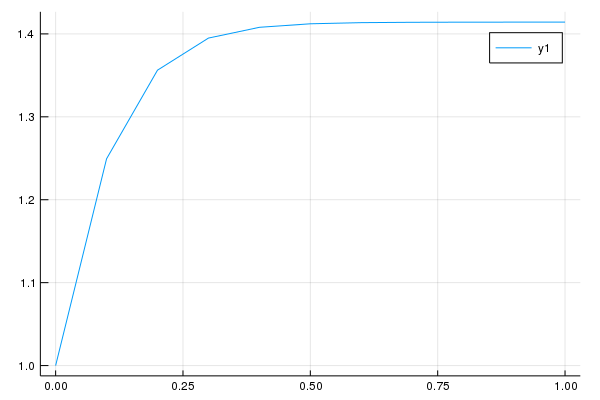

In [1]:
using Plots
plot(ts, xs)

<h3>General second-order RK method</h3>

<p>The general second-order method may have coefficients:</p>


$$
\begin{align}
x(t+h) &= x + w_1 hf + w_2 hf(t +\alpha h, x + \beta h f) + \mathcal{O}(h^3) \\
       &= x + w_1 hf + w_2 h \left( f + \alpha hf_t + \beta h f
	   f_x\right) + \mathcal{O}(h^3) \quad \text{Using Taylor on
	   f(.,.)}\\
   & = x + h\cdot (w_1+w_2) f + h^2\cdot w_2\alpha f_t + h^2 w_2\beta
   f f_x + \mathcal{O}(h^3)
\end{align}
$$


<p>Comparing to an earlier equation:</p>


$$
x(t+j_ = x + h \cdot  f + h^2 \cdot (1/2) f_t + h^2 \cdot (1/2) f
f_x + + \mathcal{O}(h^3),
$$


<p>the coefficients should satisfy: $w_1 + w_2=1, w_2\alpha = 1/2, w_2\beta = 1/2$.</p>

<p>Setting $w_1 = 0, w_2 = 1, \alpha = \beta = 1/2$ gives:</p>


$$
\begin{align*}
x(t+h) &= x(t) + F2\\
F_1 &= h f(t,x)\\
F_2 &= h f(t + h/2, x + F_1/2).
\end{align*}
$$


<p>This is called a modified Euler method. (Euler's method is of the form $x(t+h) = x(t) + F_1$.)</p>

<h3>Example</h3>

<p>Apply both Euler and the modifed Euler to the IVP</p>


$$
x'(t) = \pi e^{-t} \cdot \cos(\pi t) - x, \quad x(0) = 0.
$$


In [1]:
f(t, x) = pi * exp(-t) * cos(pi*t) - x
h = 1/25
F1(t, x) = h * f(t,x)
F2(t, x) = h * f(t + h/2, x + F1(t,x)/2)
ts = [0.0]
es = [0.0]
mes = [0.0]
for i in 1:25
t,ex,mx = ts[end], es[end], mes[end]
push!(ts, t + h)
push!(es, ex + F1(t, ex))
push!(mes, mx + F2(t, mx))
end

<p>To visualize, we have:</p>

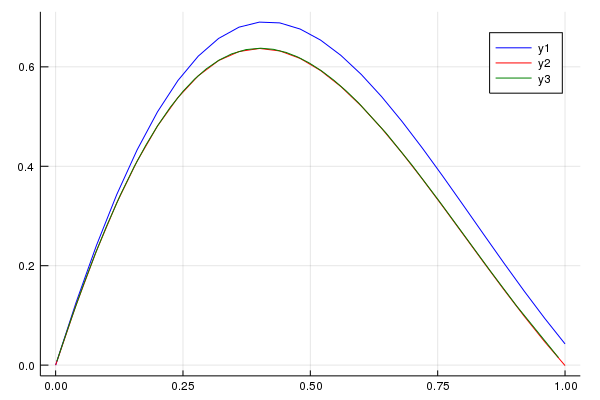

In [1]:
using Plots
plot(ts, es, color=:blue)
plot!(ts, mes, color=:red)
plot!(t -> exp(-t) *sin(pi*t), 0, 1, color=:green)

<p>As can be seen the modified Euler has a smaller error.</p>

<h2>Higher order RK methods</h2>

<p>This process can be repeated. Here is an answer for the classical RK method of order 4 (error $\approx \mathcal{O}(h^5)$):</p>


$$
x(t+h) = x(t) + \frac{1}{6}F_1 + \frac{1}{3} F_2 + \frac{1}{3}F_3 + \frac{1}{6}F_4
$$


<p>where</p>


$$
\begin{align*}
F1(t,x) &= h f(t,x)\\
F2(t,x) &= hf(t + h/2, x + F_1/2)\\
F3(t,x) &=  hf(t + h/2, x + F_2/2)\\
F4(t,x) &=  hf(t + h, x + F_3).
\end{align*}
$$


<p>We can    visualize and compare:</p>

In [1]:
F3(t,x) = h*f(t + h/2, x + F2(t,x)/2)
F4(t,x) = h*f(t + h, x + F3(t,x))
ts = [0.0]
m4es = [0.0]

for i in 1:25
t,x= ts[end], m4es[end]
push!(ts, t + h)
push!(m4es,  x + F1(t,x)/6 + F2(t,x)/3 + F3(t,x)/3 + F4(t,x)/6 )
end

<p>We compare to the exact answer</p>

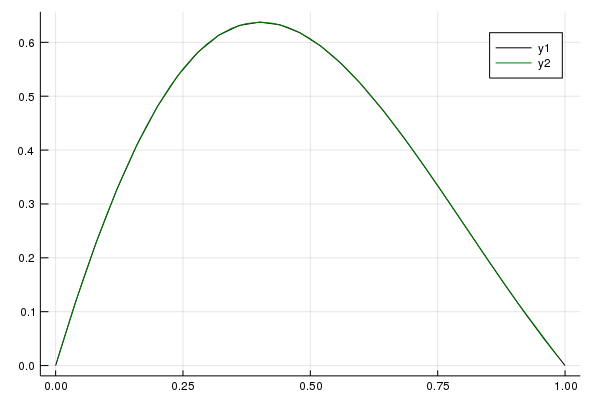

In [1]:
plot(ts, m4es, color=:black)
plot!(t -> exp(-t) *sin(pi*t), 0, 1, color=:green)

<h2>General form</h2>

<p>This is from <a href="http://tinyurl.com/pzm7tww">Wikipedia</a></p>

<p>The general form of an RK method becomes:</p>


$$
x_{n+1} = x_n + h \sum_{i=1}^s b_i k_i
k_i = f(t_n + c_i h, x_n + h \sum_{j=1}^s a_{ij} k_j)
$$


<p>Where, the coefficients $a,b,c$ are from a table (a Butcher Tableu)</p>


$$
\begin{array}{c|cccc}
c_1 & a_{11} & a_{12} & \cdots & a_{1s}\\
c_2 & a_{21} & a_{22} & \cdots & a_{2s}\\
&&\cdots&&\\
c_s & a_{s1} & a_{s2} & \cdots & a_{ss}\\
\hline
& b_1 & b_2 & \cdots & b_s
\end{array}
$$


<p>Specializing this to <strong>explicit</strong> equations – ones where the $k_i$'s can be computed directly – the matrix becomes lower triangular:</p>


$$
\begin{array}{c|cccc}

0 &  &  & & \\
c_2 & a_{21} & &  & \\
&&\cdots&&\\
c_s & a_{s1} & a_{s2} & \cdots & a_{s,s-1}\\
\hline
& b_1 & b_2 & \cdots & b_s
\end{array}
$$


<p>Consistency – a criteria for convergence – imposes the condition $c_i = \sum_{j=1}^{i-1} a_{ij}$.</p>

<p>With this, the Heun method:</p>


$$
\begin{align*}
k1 &= f(t, x)\\
k2 &= f(t + h, x + h\cdot k1)
\end{align*}
$$


<p>Becomes</p>


$$
\begin{array}{c|ccc}
0 & &     &\\
1/2 & 1/2   &\\
\hline
& 1 & 1
\end{array}
$$


<p>The modified Euler method becomes</p>


$$
\begin{array}{c|ccc}
0 & &     &\\
1 & 1   &\\
\hline
& 1/2 & 1/2
\end{array}
$$


<p>And the 4th-order one</p>


$$
\begin{array}{c|ccccc}
0 & &  & & & \\
1/2 &  1/2 &&& \\
1/2 &  0 & 1/2 &&\\
1   &  0 & 0 & 1& \\
&  1/6& 1/3 & 1/3 & 1/6 &
\hline
\end{array}
$$


<p>To see some examples: <a href="https://github.com/JuliaLang/ODE.jl/blob/master/src/runge_kutta.jl">Runge-Kutta</a> .</p>

<h3>Examples</h3>

<p>These methods – and much more – are implemented in Julia's differential equations packages. (These must be installed to be used on JuliaBox)</p>

<p>For example,</p>

In [1]:
using OrdinaryDiffEq
f(u, p, t) = pi * exp(-t) * cos(pi*t) - u
u0 = 0.0
tspan = (0.0, 1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob,DP5(),reltol=1e-8,abstol=1e-8) # solve(prob) for defaults
sol(.5)

0.6065306526034715

<p>Here <code>DP5</code> specifies the Runge-Kutta method with order 4-5.</p>

<p>Plotting a solution is easy:</p>

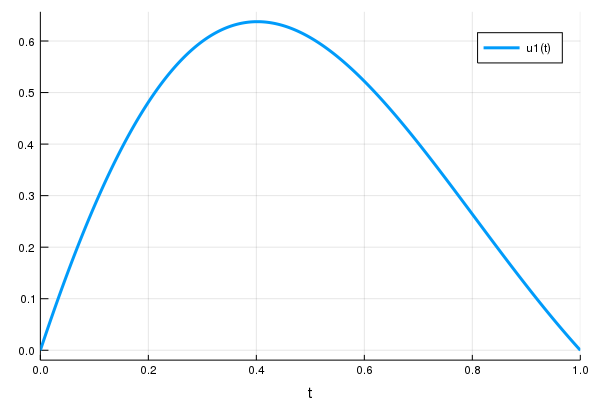

In [1]:
plot(sol)

<p>The <code>DP5&#40;&#41;</code> bit specifies the RK-4-5 method, the adaptive <code>Tsit5&#40;&#41;</code>, the default, is more efficient:</p>

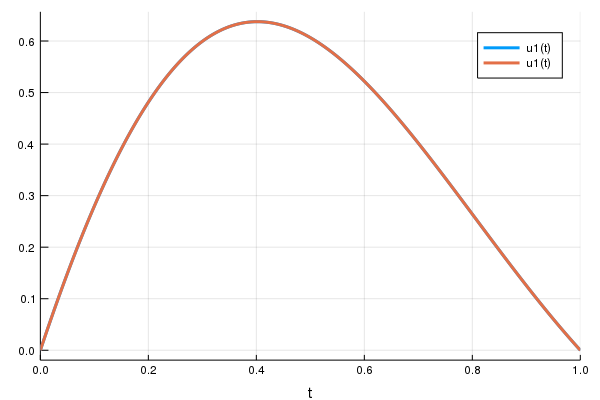

In [1]:
sol1 = solve(prob,Tsit5())
plot!(sol1)

<p>In MATLAB, the <code>ode45</code> function is the typical workhorse. A Julia implementation is <a href="https://github.com/JuliaDiffEq/ODE.jl/blob/master/src/runge_kutta.jl">here</a>.</p>

<p>Higher order RK methods are available, but as the order goes up, the number of function calls does as well, so typical is the 4-5 method.</p>

<h2>Error</h2>

<p>The local truncation error for the 4th order RK method is like $C h^5$, as the Taylor series used employs exact terms up to $h^4$.</p>

<p>If we have, as in the book, $x^*$ be the approximate solution and $x$ the exact one (opposite the book, p543), we have:</p>


$$
x(t_0 + h) - x^*(t_0+h) = \text{local truncation error} = C h^5.
$$


<p>This is manageable unless $C$ gets very big.</p>

$C$

<p>is a constant dependent on $t$ and $h$, but <em>suppose</em> it does not change as $t$ changes to $t+h$.</p>

<p>Let $v$ be the value by taking one step of length $h$ from $t_0$.</p>

<p>Let $u$ be the value by taking <em>two</em> steps of length $h/2$ from $t_0$.</p>

<p>Then with this error, we have:</p>


$$
\begin{align}
x(t + h) &= v + C h^5, \quad \text{whereas}\\
x(t_h) &= h + 2 \cdot C(h/2)^5.
\end{align}
$$


<p>The local truncation error, $Ch^5$ then looks like $(u-v)/(1 - 2^{-4}) \approx (u-v).$</p>

<p>The book suggests that this difference can be monitored during the algorithm. If it gets too large the algorithm has more accumulated error than expected, and if so, can be repeated with a smaller $h$ in hopes of circumventing this.</p>